<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_circles
import pandas as pd

### Device Agnostic Code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Data

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Make a dataframe of circles
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

In [ ]:
circles[:10]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


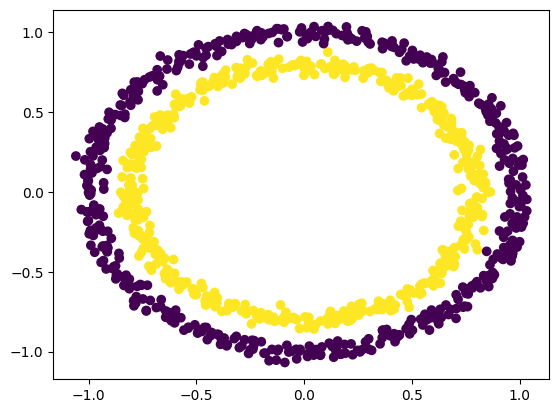

In [ ]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=y)

## Check input and output

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first sample of feature and labels
print(f"Sample input data: {X[0]}, Sample input data's label: {y[0]}")
print(f"Shape of input data: {X[0].shape}, Shape of label: {y[0].shape}")

Sample input data: [0.75424625 0.23148074], Sample input data's label: 1
Shape of input data: (2,), Shape of label: ()


## Turn data into tensors

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train[0].unsqueeze(dim=1).size()

torch.Size([2, 1])

# Building a model

In [ ]:
class CirclePointsModel0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 Linear Layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CirclePointsModel0().to(device)
print(f"Model Parameters: {model_0.state_dict()}")
model_0

Model Parameters: OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]])), ('layer_1.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])), ('layer_2.weight', tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])), ('layer_2.bias', tensor([-0.2060]))])


CirclePointsModel0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

print(f"Model Parameters: {model_0.state_dict()}")
print(f"Model Summary: {model_0}")

Model Parameters: OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
        [ 0.4691, -0.5582],
        [-0.3260, -0.1997],
        [-0.4252,  0.0667],
        [-0.6984,  0.6386]])), ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])), ('1.weight', tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])), ('1.bias', tensor([-0.1213]))])
Model Summary: Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
untrained_preds = model_0(X_test.to(device))
untrained_preds[:5]

tensor([[ 0.2401],
        [ 0.1183],
        [-0.0243],
        [ 0.0169],
        [ 0.3263]], grad_fn=<SliceBackward0>)

## Setup Loss function & Optimizer

In [ ]:
# Loss Function
loss = torch.nn.BCEWithLogitsLoss() # It combines sigmoid activation with BCELoss

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # eq is equal
  acc = (correct / len(y_pred)) * 100
  return acc

# Plot Model's History
def model_history(epochs, train_loss, test_loss, train_accuracy, test_accuracy):
  plt.figure(figsize=(10, 7))

  # Plot training and test loss
  plt.subplot(2, 2, 1)  # Upper left subplot (row 1, col 1)
  plt.plot(range(0, epochs), train_loss, label="Train Loss")
  plt.plot(range(0, epochs), test_loss, label="Test Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.title("Loss")

  # Plot training and test accuracy
  plt.subplot(2, 2, 2)  # Upper right subplot (row 1, col 2)
  plt.plot(range(0, epochs), train_accuracy, label="Train Accuracy")
  plt.plot(range(0, epochs), test_accuracy, label="Test Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.title("Accuracy")

  plt.show()

## Train Loop

In [ ]:
torch.manual_seed(42)

train_accuracy_l, test_accuracy_l = [], []
train_loss_l, test_loss_l = [], []

# Set epochs
epochs = 100

# Set data on device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Set model on train mode
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # Because the shape of logits is (REQ, 1)
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss_train = loss(y_logits, y_train) # Since we're using BCEWithLogitLoss; it expects raw logits as input, whereas BCELoss expects prediction probabilities
  acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred)

  train_accuracy_l.append(acc_train)
  train_loss_l.append(loss_train.detach().numpy())

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss_train.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calc test lost and accuracy
    loss_test = loss(test_logits, y_test)
    acc_test = accuracy_fn(y_true=y_test, y_pred=test_pred)

    test_loss_l.append(loss_train.detach().numpy())
    test_accuracy_l.append(acc_test)


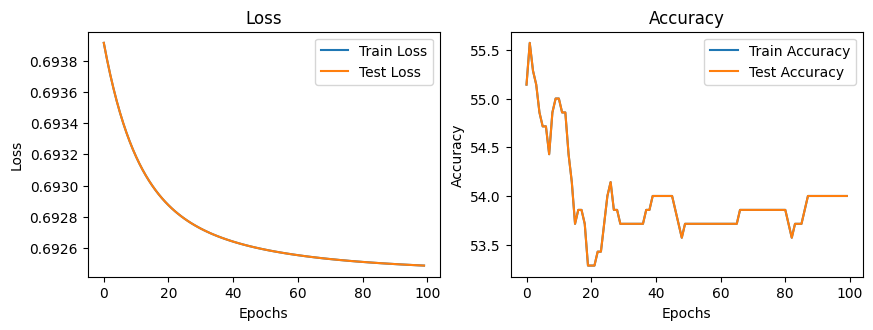

In [ ]:
model_history(epochs=epochs, train_loss=train_loss_l, test_loss=test_loss_l, train_accuracy=train_accuracy_l, test_accuracy=train_accuracy_l)

# Building a Non-linear model

In [ ]:
n_samples = 1000

Xn, yn = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.3)

In [ ]:
Xn[:5], yn[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

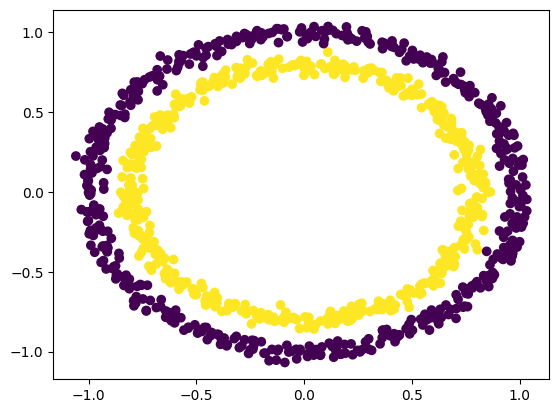

In [ ]:
plt.scatter(x=Xn[:,0], y=Xn[:,1], c=yn)

In [ ]:
# Convert data to tensors and split

Xn = torch.Tensor(Xn)
yn = torch.Tensor(yn)

In [ ]:
class CirclePointsModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CirclePointsModel1()
model_1

CirclePointsModel1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss fn and optimizer

loss = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1)

In [ ]:
train_loss_nl, test_loss_nl = [], []
trian_accuracy_nl, test_accuracy_nl = [], []

# Set Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on device
X_train, y_train = Xn.to(device), yn.to(device)
X_test, y_test = Xn.to(device), yn.to(device)

epochs = 100

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  acc_train = accuracy_fn(y_train.cpu(), y_pred.cpu())
  trian_accuracy_nl.append(acc_train)

  loss_train = loss(y_logits, y_train)
  train_loss_nl.append(loss_train.detach().numpy())

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_logits_test = model_1(X_test).squeeze()

    y_pred_test = torch.round(torch.sigmoid(y_logits_test))

    loss_test = loss(y_logits_test, y_test)

    acc_test = accuracy_fn(y_true=y_test.cpu(), y_pred=y_pred_test.cpu())

    test_accuracy_nl.append(acc_test)
    test_loss_nl.append(loss_test.detach().numpy())

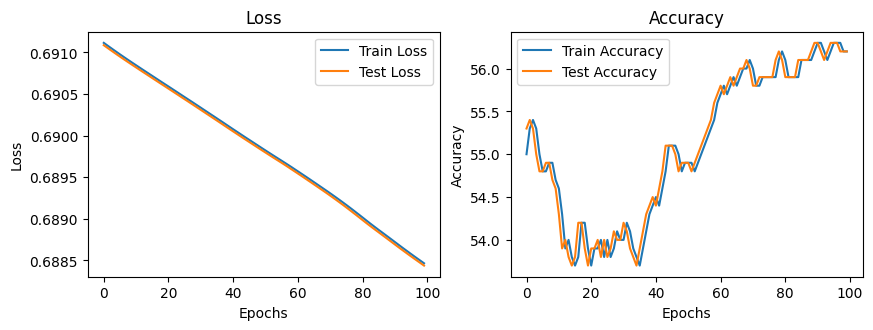

In [ ]:
model_history(epochs=epochs, train_loss=train_loss_nl, test_loss=test_loss_nl, train_accuracy=trian_accuracy_nl, test_accuracy=test_accuracy_nl)

# Improving the model performance

For that we need to tune the **hyperparameters**

The following are the hyperparameters we can tune:

1. Add new Layers
2. Change number of Neurons within layers
3. Number of Batches in Batch Normalization
4. Change the Activation Function
5. Changing the Learning Rate
6. Change the Loss Function
7. Change the Optimizer
8. Change number of Epochs

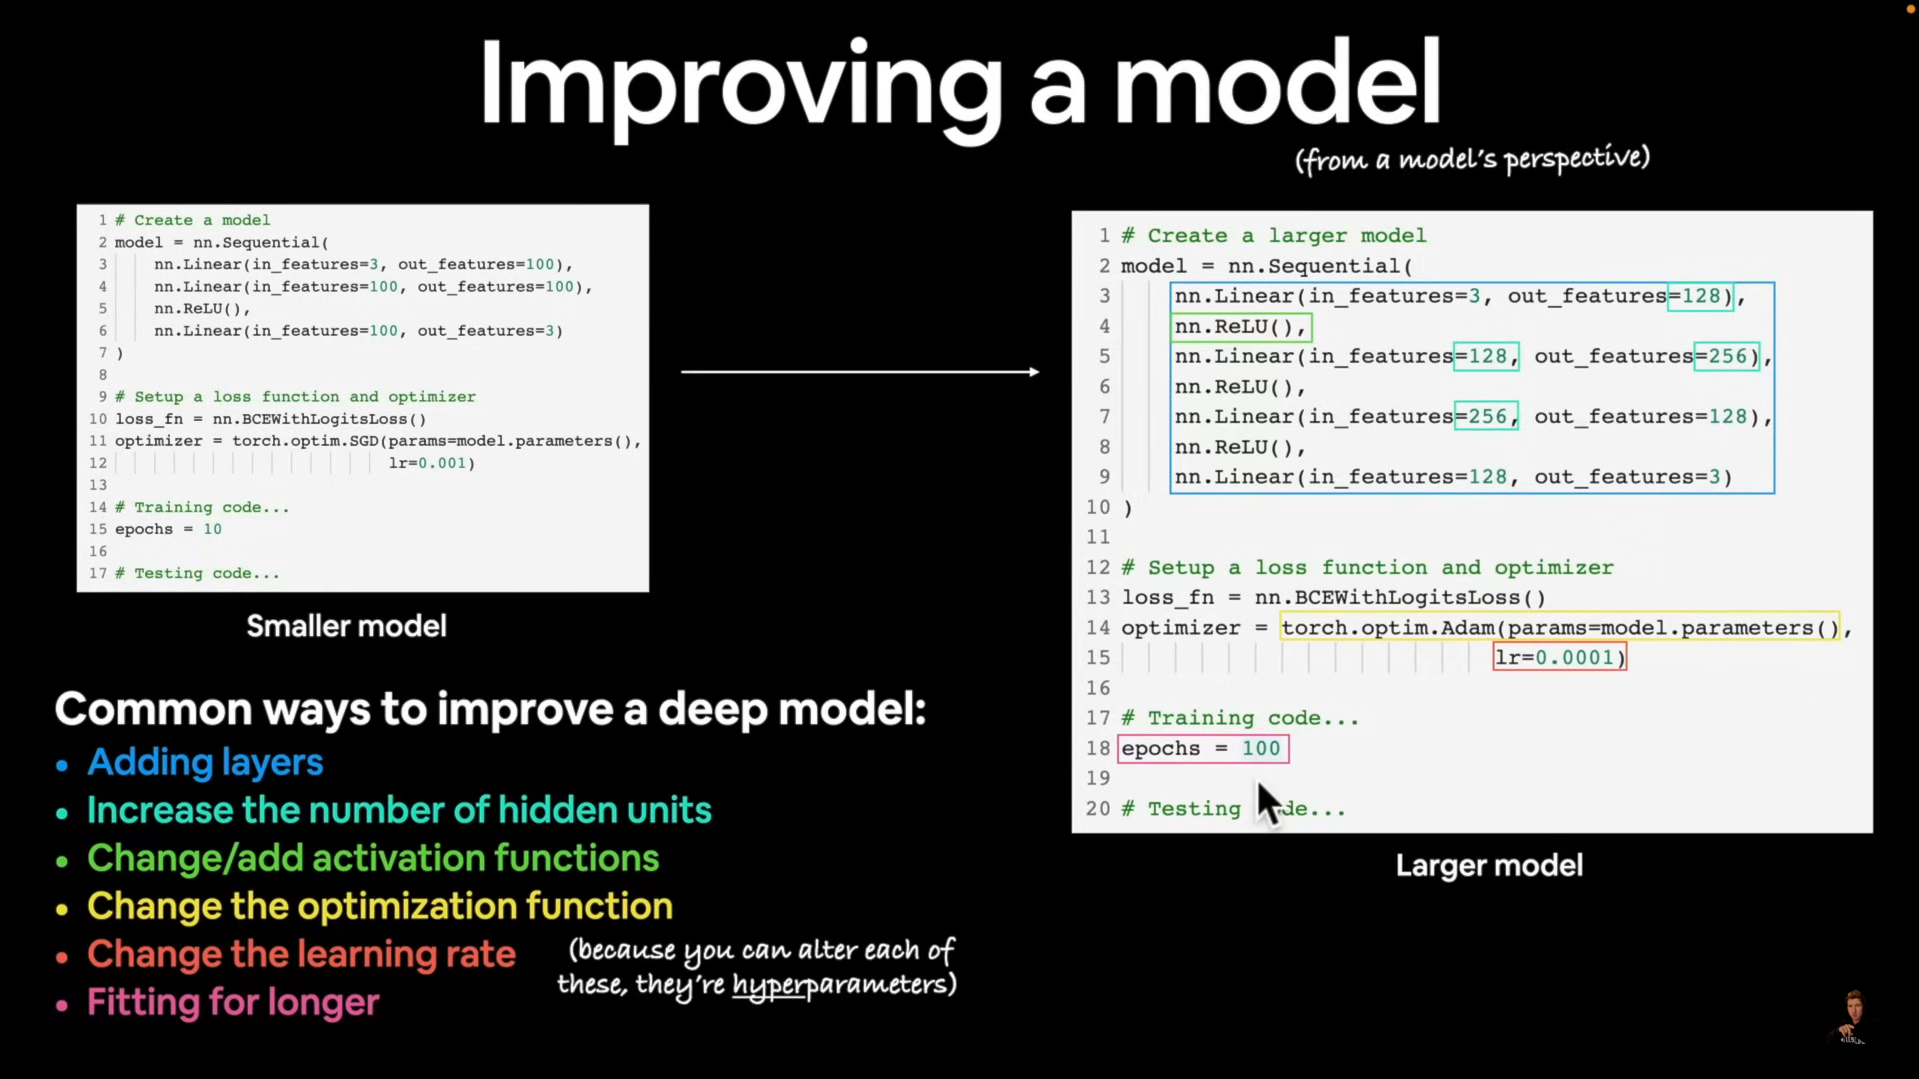

In [ ]:
class CirclePointsModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=4)
    self.layer_2 = nn.Linear(in_features=4, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=16) ## Added one more layer & changed number of neurons
    self.layer_4 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_2 = CirclePointsModel2()
model_2

CirclePointsModel2(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss Function & Optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01) # Changed optimizer and LR.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_accuracy_nl_tuned, test_accuracy_nl_tuned = [], []
train_loss_nl_tuned, test_loss_nl_tuned = [], []

epochs = 100

# Train and Test data already on required device

for epoch in range(epochs):

  # Set model on train mode
  model_2.train()

  # 1. Forward Pass
  y_logits = model_2(X_train).squeeze(dim=1)
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate Loss
  train_loss = loss_fn(y_logits, y_train)
  acc_train = accuracy_fn(y_true=y_train, y_pred=y_preds)

  train_loss_nl_tuned.append(train_loss.detach().numpy())
  train_accuracy_nl_tuned.append(acc_train)

  # 3. Set optimizer on zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Set model on evaluation mode for testing
  model_2.eval()
  with torch.inference_mode():

    y_test_logits = model_2(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits, y_test)
    acc_test = accuracy_fn(y_true=y_test, y_pred=y_test_preds)

    test_loss_nl_tuned.append(test_loss.detach().numpy())
    test_accuracy_nl_tuned.append(acc_test)

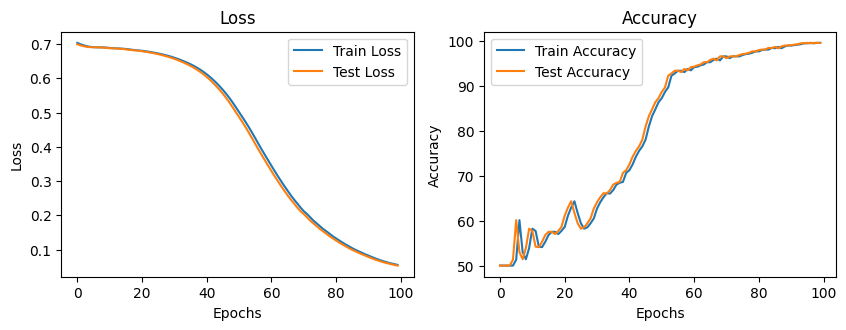

In [ ]:
model_history(epochs=epochs,
              train_loss=train_loss_nl_tuned,
              test_loss=test_loss_nl_tuned,
              train_accuracy=train_accuracy_nl_tuned,
              test_accuracy=test_accuracy_nl_tuned)

# Replicating Non-Linear Functions

## ReLU

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 0.2)
A.dtype

torch.float32

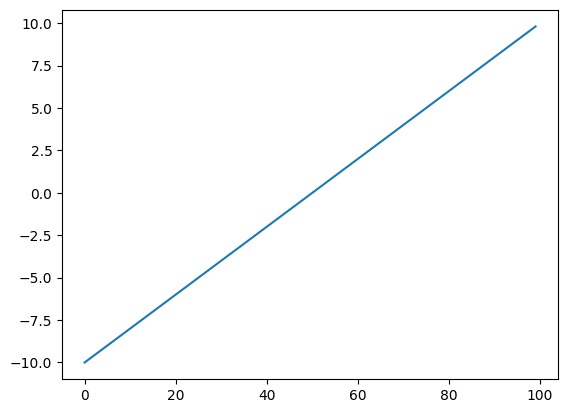

In [ ]:
plt.plot(A)

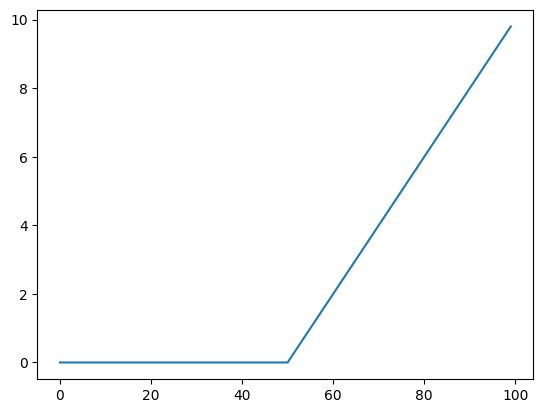

In [ ]:
relu = nn.ReLU()
plt.plot(relu(A))

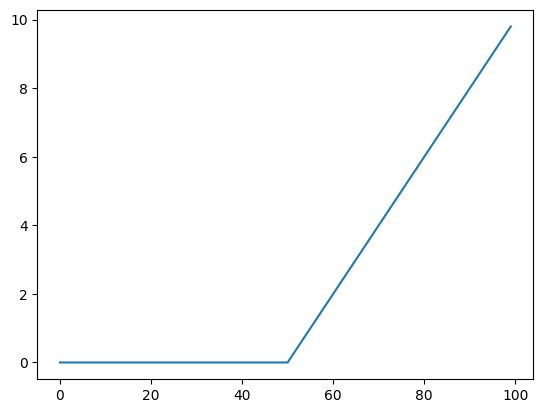

In [ ]:
def relu_fn(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

plt.plot(relu_fn(A))

## Sigmoid

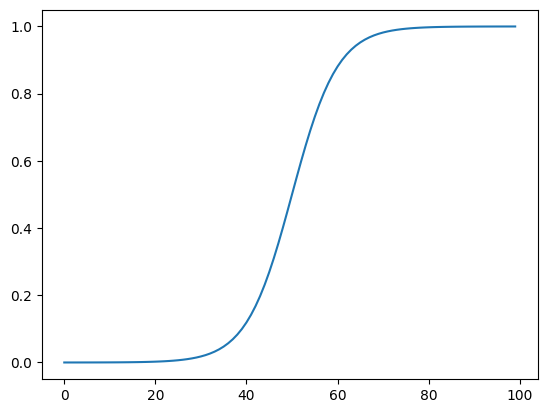

In [ ]:
sigmoid = nn.Sigmoid()
plt.plot(sigmoid(A))

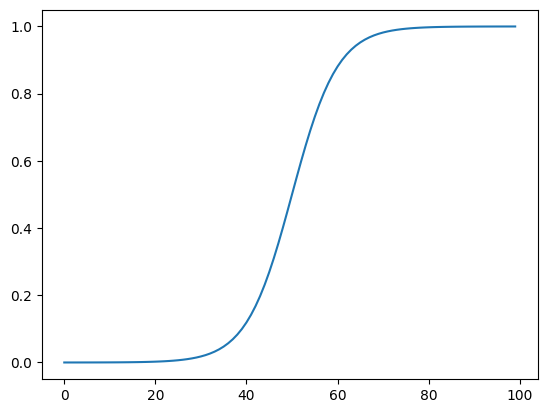

In [ ]:
def sigmoid_fn(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid_fn(A))

# Multiclass Classification

## Create a toy multi-class dataset

In [ ]:
from sklearn.datasets import make_blobs

# Parameters
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create data
X_blob, y_blob = make_blobs(n_samples=5678,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=2, # higher the value, closer the different classes will be to eachother
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split the data
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=test_size, random_state=RANDOM_SEED)

## Visualize the data

Text(0.5, 1.0, "Multiclass Classification Data - from sklearn's blob")

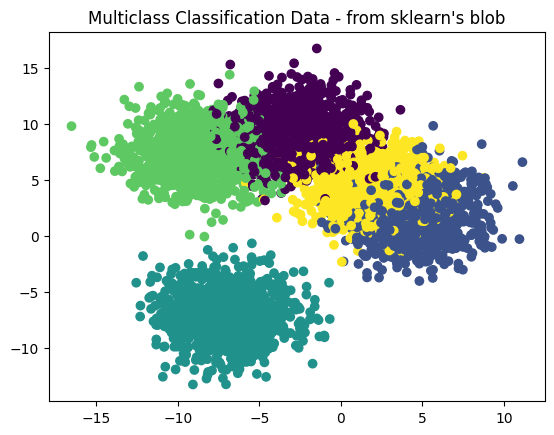

In [ ]:
x_axis = X_blob[:, 0]
y_axis = X_blob[:, 1]
plt.scatter(x_axis, y_axis, c=y_blob)
plt.title("Multiclass Classification Data - from sklearn's blob")

## Creating the model

In [ ]:
class BlobModel0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=4):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Dropout(p=0.15),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Dropout(p=0.15),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

mcc_model_0 = BlobModel0(input_features=2,
                         output_features=5,
                         hidden_units=8)
mcc_model_0

BlobModel0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.15, inplace=False)
    (3): Linear(in_features=8, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.15, inplace=False)
    (6): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [ ]:
# Setup the Loss Function & Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=mcc_model_0.parameters(), lr=0.01)

## Training Loop

In [ ]:
# Set data on correct device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# Set number of epochs
epochs = 100

# For storing the history of model
train_loss_mcc_model_0, test_loss_mcc_model_0 = [], []
train_accuracy_mcc_model_0, test_accuracy_mcc_model_0 = [], []

for epoch in range(epochs):

  # Set model to train
  mcc_model_0.train()

  # 1. Forward Pass
  y_logits = mcc_model_0(X_train)
  #y_preds = torch.argmax(torch.softmax(y_logits, dim=0))
  y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

  # 2. Calculate Loss
  train_loss = loss_fn(y_logits, y_train.long())

  acc_train = accuracy_fn(y_true=y_train, y_pred=y_preds)

  train_loss_mcc_model_0.append(train_loss.detach().numpy())
  train_accuracy_mcc_model_0.append(acc_train)


  # 3. Set optimizer to zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Evaluation
  mcc_model_0.eval()
  with torch.inference_mode():
    y_test_logits = mcc_model_0(X_test)
    #y_test_preds = torch.argmax(torch.softmax(y_test_logits, dim=1))
    y_test_preds = torch.argmax(torch.softmax(y_test_logits, dim=1), dim=1)

    test_loss = loss_fn(y_test_logits, y_test.long())
    acc_test = accuracy_fn(y_true=y_test, y_pred=y_test_preds)

    test_loss_mcc_model_0.append(test_loss.detach().numpy())
    test_accuracy_mcc_model_0.append(acc_test)

## Evaluation

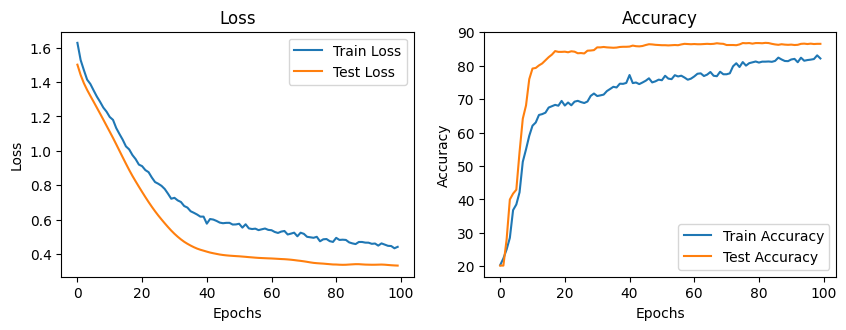

In [ ]:
model_history(epochs=epochs,
              train_loss=train_loss_mcc_model_0,
              test_loss=test_loss_mcc_model_0,
              train_accuracy=train_accuracy_mcc_model_0,
              test_accuracy=test_accuracy_mcc_model_0)

# Exercise

## 1. Binary Classification on make_moons dataset

In [ ]:
from sklearn.datasets import make_moons

RANDOM_SEED = 42

# Create data
X_m, y_m = make_moons(n_samples=1000,
                      random_state=RANDOM_SEED,
                      noise=0.1)

# Convert data to TENSORS
X_m, y_m = torch.from_numpy(X_m).type(torch.float), torch.from_numpy(y_m).type(torch.float)

# Split dataset
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_m, y_m, test_size=0.2)

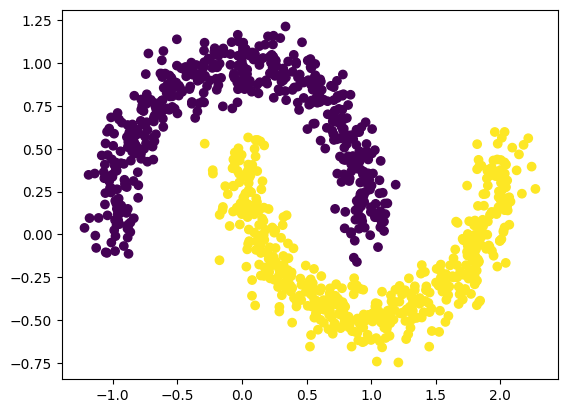

In [ ]:
x_axis_moons = X_m[:, 0]
y_axis_moons = X_m[:, 1]
plt.scatter(x_axis_moons, y_axis_moons, c=y_m)

In [ ]:
INPUT_FEATURES = 2
OUTPUT_FEATURES = 1
HIDDEN_UNITS = 4

class MoonModel0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=4):
    super().__init__()
    self.layers_stack = nn.Sequential(
        nn.Linear(in_features=INPUT_FEATURES, out_features=4),
        nn.ReLU(),
        nn.Dropout(p=0.15),
        nn.Linear(in_features=4, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=1),
        )

  def forward(self, x):
    return self.layers_stack(x)

moon_model_0 = MoonModel0(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_UNITS)
moon_model_0

MoonModel0(
  (layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.15, inplace=False)
    (3): Linear(in_features=4, out_features=8, bias=True)
    (4): ReLU()
    (5): Linear(in_features=8, out_features=16, bias=True)
    (6): ReLU()
    (7): Linear(in_features=16, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=64, bias=True)
    (10): ReLU()
    (11): Linear(in_features=64, out_features=128, bias=True)
    (12): ReLU()
    (13): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [ ]:
# Loss Function & Optimizer

loss_fn_moon = nn.BCEWithLogitsLoss()
optimizer_moon = torch.optim.Adam(params=moon_model_0.parameters(), lr=0.01)

In [ ]:
# Random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
epochs=100

# Set data on correct device
X_train_moon, y_train_moon, X_test_moon, y_test_moon = X_train_moon.to(device), y_train_moon.to(device), X_test_moon.to(device), y_test_moon.to(device)

# Model History
train_loss_moon_model_0, test_loss_moon_model_0 = [], []
train_accuracy_moon_model_0, test_accuracy_moon_model_0 = [], []

for epoch in range(epochs):
  moon_model_0.train()

  y_logits = moon_model_0(X_train_moon).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn_moon(y_logits, y_train_moon)
  acc_train = accuracy_fn(y_pred = y_preds, y_true=y_train_moon)


  train_loss_moon_model_0.append(train_loss.detach().numpy())
  train_accuracy_moon_model_0.append(acc_train)

  optimizer_moon.zero_grad()
  train_loss.backward()
  optimizer_moon.step()

  moon_model_0.eval()
  with torch.inference_mode():
    y_test_logits = moon_model_0(X_test_moon).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn_moon(y_test_logits, y_test_moon)
    acc_test = accuracy_fn(y_pred = y_test_preds, y_true=y_test_moon)

    test_loss_moon_model_0.append(test_loss.detach().numpy())
    test_accuracy_moon_model_0.append(acc_test)

    if acc_train >= 96:
      early_stopping = epoch
      print(f"Desired accuracy reached at epoc {epoch}")
      break

In [ ]:
early_stopping

43

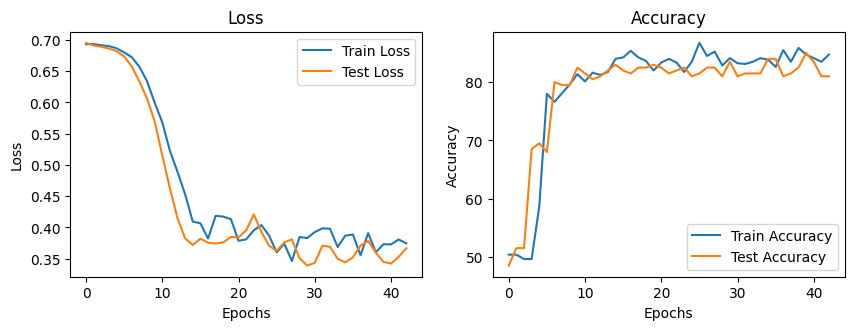

In [ ]:
model_history(epochs=early_stopping,
              train_loss=train_loss_moon_model_0[:early_stopping],
              test_loss=test_loss_moon_model_0[:early_stopping],
              train_accuracy=train_accuracy_moon_model_0[:early_stopping],
              test_accuracy=test_accuracy_moon_model_0[:early_stopping])

## Replicate Tanh activation function

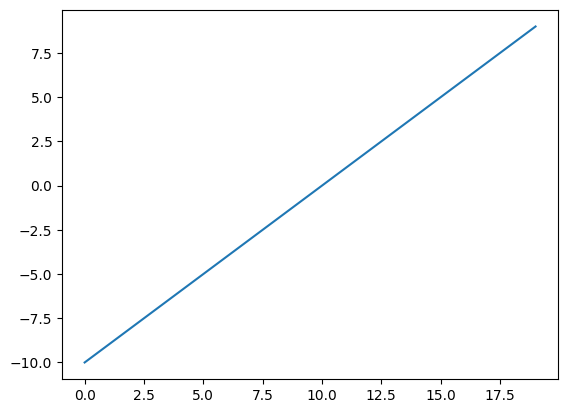

In [ ]:
a = torch.arange(-10,10,1)

plt.plot(a)

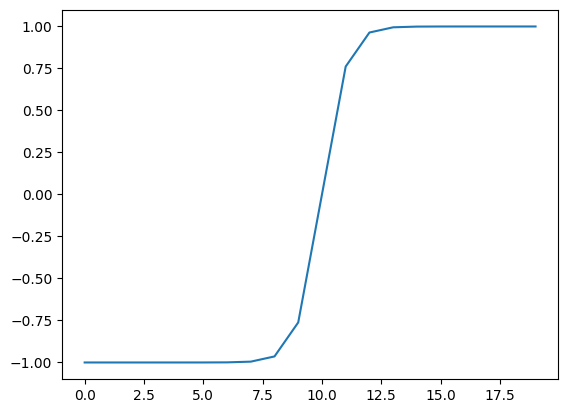

In [ ]:
Tanh = nn.Tanh()
plt.plot(Tanh(a))

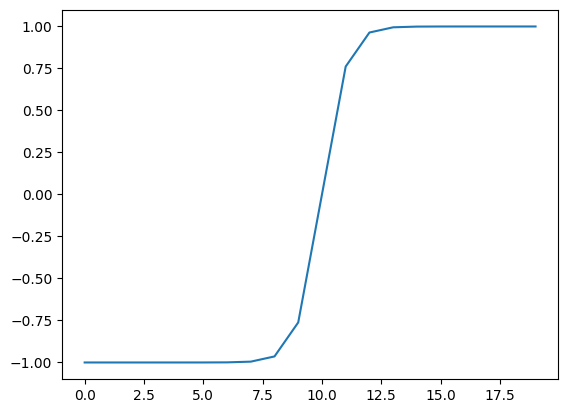

In [ ]:
def Tanh_func(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(Tanh_func(a))

## 3. Multiclass Classification

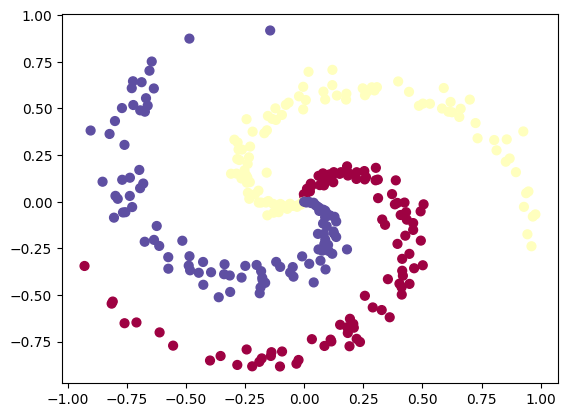

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()